In [1]:
import sys
sys.path.append('/home/aistudio/mylib')
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager
import seaborn as sns
import numpy as np
# 设置matplotlib使用中文字体以正确显示中文字符
font_path = r'/home/aistudio/workplace/STKAITI.TTF'  
font_prop = font_manager.FontProperties(fname=font_path)


font_manager.fontManager.addfont(font_path)

# 设置默认字体
plt.rcParams['font.sans-serif'] = ['STKaiti']  


In [2]:
df=pd.read_csv('/home/aistudio/商品.csv',encoding='GB2312')
display(df.sample(6),df.info(),df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42816 entries, 0 to 42815
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   顾客编号    42816 non-null  int64  
 1   大类编码    42816 non-null  int64  
 2   大类名称    42816 non-null  object 
 3   中类编码    42816 non-null  int64  
 4   中类名称    42816 non-null  object 
 5   小类编码    42816 non-null  int64  
 6   小类名称    42816 non-null  object 
 7   销售日期    42816 non-null  int64  
 8   销售月份    42816 non-null  int64  
 9   商品编码    42816 non-null  object 
 10  规格型号    42816 non-null  object 
 11  商品类型    42816 non-null  object 
 12  单位      42816 non-null  object 
 13  销售数量    42814 non-null  float64
 14  销售金额    42816 non-null  float64
 15  商品单价    42816 non-null  float64
 16  是否促销    42816 non-null  object 
dtypes: float64(3), int64(6), object(8)
memory usage: 5.6+ MB


,顾客编号,大类编码,大类名称,中类编码,中类名称,小类编码,小类名称,销售日期,销售月份,商品编码,规格型号,商品类型,单位,销售数量,销售金额,商品单价,是否促销
17722,726,12,蔬果,1202,加工豆类,120204,豆干豆皮,20150216,201502,DW-1202048046,散称,生鲜,千克,0.322,3.21,9.96,否
1137,190,15,日配,1501,冷藏肉制品,150103,块状火腿,20150104,201501,DW-1501030018,220g,一般商品,块,1.000,3.90,3.90,否
20442,43,23,酒饮,2301,碳酸饮料,230103,果味型,20150221,201502,DW-2301030026,600ml,一般商品,瓶,1.000,2.90,2.90,否
25617,1928,22,休闲,2206,即食熟制品,220608,肉松,20150311,201503,DW-2206080052,78g,一般商品,袋,1.000,12.50,12.50,否
14934,1381,30,洗化,3016,纸制品,301603,无芯纸,20150209,201502,DW-3016030086,40±2张,一般商品,包,9.000,15.30,1.70,否
29286,592,22,休闲,2203,膨化点心,220304,薯条,20150322,201503,DW-2203040010,40g,一般商品,袋,1.000,3.50,3.50,否


None

,顾客编号,大类编码,中类编码,小类编码,销售日期,销售月份,销售数量,销售金额,商品单价
count,42816.000000,42816.000000,42816.000000,42816.000000,4.281600e+04,42816.000000,42814.000000,42816.000000,42816.000000
mean,876.944740,17.934884,1799.512495,179959.814976,2.015026e+07,201502.443362,1.199202,10.608517,12.541321
std,695.075098,6.061163,608.934950,60896.114008,1.151572e+02,1.149795,2.519092,41.826800,16.658380
min,0.000000,10.000000,1001.000000,100101.000000,2.015010e+07,201501.000000,-16.000000,-145.000000,0.000000
25%,279.000000,12.000000,1201.000000,120106.000000,2.015013e+07,201501.000000,0.530000,2.900000,3.960000
50%,729.000000,20.000000,2001.000000,200103.000000,2.015022e+07,201502.000000,1.000000,5.700000,6.900000
75%,1350.250000,22.000000,2203.000000,220306.000000,2.015040e+07,201504.000000,1.000000,10.960000,14.992500
max,2611.000000,34.000000,3436.000000,343699.000000,2.015043e+07,201504.000000,216.000000,5340.000000,890.000000


### 一.数据预处理

#### 1.查看缺失值

In [3]:
missing_per_column = df.isnull().sum()
print(missing_per_column)

顾客编号    0
大类编码    0
大类名称    0
中类编码    0
中类名称    0
小类编码    0
小类名称    0
销售日期    0
销售月份    0
商品编码    0
规格型号    0
商品类型    0
单位      0
销售数量    2
销售金额    0
商品单价    0
是否促销    0
dtype: int64


#### 2.删除缺失值

In [4]:
df=df.dropna(subset='销售数量')
missing_per_column = df.isnull().sum()
print(missing_per_column)

顾客编号    0
大类编码    0
大类名称    0
中类编码    0
中类名称    0
小类编码    0
小类名称    0
销售日期    0
销售月份    0
商品编码    0
规格型号    0
商品类型    0
单位      0
销售数量    0
销售金额    0
商品单价    0
是否促销    0
dtype: int64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42814 entries, 0 to 42815
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   顾客编号    42814 non-null  int64  
 1   大类编码    42814 non-null  int64  
 2   大类名称    42814 non-null  object 
 3   中类编码    42814 non-null  int64  
 4   中类名称    42814 non-null  object 
 5   小类编码    42814 non-null  int64  
 6   小类名称    42814 non-null  object 
 7   销售日期    42814 non-null  int64  
 8   销售月份    42814 non-null  int64  
 9   商品编码    42814 non-null  object 
 10  规格型号    42814 non-null  object 
 11  商品类型    42814 non-null  object 
 12  单位      42814 non-null  object 
 13  销售数量    42814 non-null  float64
 14  销售金额    42814 non-null  float64
 15  商品单价    42814 non-null  float64
 16  是否促销    42814 non-null  object 
dtypes: float64(3), int64(6), object(8)
memory usage: 5.9+ MB


#### 3.时间格式转换为pandas中的datetime64格式

In [17]:
# 定义转换函数
def convert_to_datetime(date_obj):
    try:
        # 如果是浮点数或整数，先转换为字符串
        if isinstance(date_obj, (int, float)):
            date_str = str(int(date_obj))  # 转换为整数再转为字符串，去掉可能的小数部分
        elif isinstance(date_obj, str):
            date_str = date_obj
        else:
            return pd.NaT  
        # 检查是否为8位数字字符串
        if len(date_str) == 8 and date_str.isdigit():
            # 插入连字符并转换为 datetime 对象
            formatted_date = f"{date_str[:4]}-{date_str[4:6]}-{date_str[6:]}"
            return pd.to_datetime(formatted_date)
        else:
            # 如果不是有效的8位数字字符串，返回 NaT
            return pd.NaT
    except Exception as e:
        print(f"Error converting {date_obj}: {e}")
        return pd.NaT

# 应用转换函数到 '销售日期' 列
df['销售日期'] = df['销售日期'].apply(convert_to_datetime)
# 检查转换结果
print("转换后的数据:")
display(df)
# 统计并显示有多少个无效日期
invalid_dates = df['销售日期'].isna().sum()
print(f"\n无效日期数量: {invalid_dates}")

# 如果有无效日期，可以进一步检查这些行
if invalid_dates > 0:
    print("\n包含无效日期的行:")
    print(df[df['销售日期'].isna()])

Error converting 20150229: day is out of range for month: 2015-02-29, at position 0
Error converting 20150229: day is out of range for month: 2015-02-29, at position 0
转换后的数据:


,顾客编号,大类编码,大类名称,中类编码,中类名称,小类编码,小类名称,销售日期,销售月份,商品编码,规格型号,商品类型,单位,销售数量,销售金额,商品单价,是否促销
0,0,12,蔬果,1201,蔬菜,120109,其它蔬菜,2015-01-01,201501,DW-1201090311,,生鲜,个,8.000,4.00,2.00,否
1,1,20,粮油,2014,酱菜类,201401,榨菜,2015-01-01,201501,DW-2014010019,60g,一般商品,袋,6.000,3.00,0.50,否
2,2,15,日配,1505,冷藏乳品,150502,冷藏加味酸乳,2015-01-01,201501,DW-1505020011,150g,一般商品,袋,1.000,2.40,2.40,否
3,3,15,日配,1503,冷藏料理,150305,冷藏面食类,2015-01-01,201501,DW-1503050035,500g,一般商品,袋,1.000,6.50,8.30,否
4,4,15,日配,1505,冷藏乳品,150502,冷藏加味酸乳,2015-01-01,201501,DW-1505020020,100g*8,一般商品,袋,1.000,11.90,11.90,否
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42811,1605,12,蔬果,1201,蔬菜,120106,菌菇类,2015-04-30,201504,DW-1201060002,散称,生鲜,千克,0.217,3.91,18.00,否
42812,1572,12,蔬果,1201,蔬菜,120102,根茎,2015-04-30,201504,DW-1201020040,散称,生鲜,千克,0.440,0.86,1.96,否
42813,1170,30,洗化,3016,纸制品,301603,无芯纸,2015-04-30,201504,DW-3016030007,10卷,一般商品,提,1.000,12.90,14.50,是
42814,2605,12,蔬果,1201,蔬菜,120101,叶菜,2015-04-30,201504,DW-1201010023,散称,生鲜,千克,0.718,1.84,2.56,否



无效日期数量: 2

包含无效日期的行:
       顾客编号  大类编码 大类名称  中类编码   中类名称    小类编码 小类名称 销售日期    销售月份           商品编码  \
22185  1743    20   粮油  2001  袋装速食面  200105  干脆面  NaT  201502  DW-2001050005   
22188   834    30   洗化  3016    纸制品  301603  无芯纸  NaT  201502  DW-3016030007   

      规格型号  商品类型 单位  销售数量  销售金额  商品单价 是否促销  
22185  26g  一般商品  袋   1.0   0.5   0.5    否  
22188  10卷  一般商品  提   1.0  12.9  14.5    是  


#### 4.将清洗后的数据保存为csv文件

In [18]:
display(df.info(),df.sample(6))
df.to_csv('商品_clean.csv',encoding='utf-8',index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 42814 entries, 0 to 42815
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   顾客编号    42814 non-null  int64         
 1   大类编码    42814 non-null  int64         
 2   大类名称    42814 non-null  object        
 3   中类编码    42814 non-null  int64         
 4   中类名称    42814 non-null  object        
 5   小类编码    42814 non-null  int64         
 6   小类名称    42814 non-null  object        
 7   销售日期    42812 non-null  datetime64[ns]
 8   销售月份    42814 non-null  int64         
 9   商品编码    42814 non-null  object        
 10  规格型号    42814 non-null  object        
 11  商品类型    42814 non-null  object        
 12  单位      42814 non-null  object        
 13  销售数量    42814 non-null  float64       
 14  销售金额    42814 non-null  float64       
 15  商品单价    42814 non-null  float64       
 16  是否促销    42814 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(5), object(8)
m

None

,顾客编号,大类编码,大类名称,中类编码,中类名称,小类编码,小类名称,销售日期,销售月份,商品编码,规格型号,商品类型,单位,销售数量,销售金额,商品单价,是否促销
38988,877,12,蔬果,1201,蔬菜,120102,根茎,2015-04-21,201504,DW-1201020045,散称,生鲜,千克,0.226,1.72,7.60,否
39539,499,22,休闲,2210,果冻,221004,立袋可吸果冻,2015-04-22,201504,DW-2210040015,150g,一般商品,袋,1.000,2.30,2.30,否
39428,411,23,酒饮,2303,果汁饮料,230304,植物蛋白饮料,2015-04-22,201504,DW-2303040062,450g,一般商品,瓶,1.000,5.00,5.00,否
36357,2374,12,蔬果,1201,蔬菜,120102,根茎,2015-04-13,201504,DW-1201020017,散称,生鲜,千克,0.657,1.68,2.56,否
11329,459,10,肉禽,1004,鸡产品,100402,分割鸡件,2015-01-29,201501,DW-1004020004,散称,生鲜,千克,0.216,3.80,17.60,否
6666,847,33,文体,3323,本类,332399,其他本类,2015-01-19,201501,DW-3323990043,9392,一般商品,本,1.000,2.00,2.00,否


### 二、数据可视化

#### 1.读取清洗后的文件

In [35]:
df=pd.read_csv('商品_clean.csv',encoding='utf-8')
df['销售日期'] = pd.to_datetime(df['销售日期'])
# 如果 '销售月份' 列实际上是从 '销售日期' 列中提取出来的，你可以这样做：
df['销售月份'] = df['销售日期'].dt.month  # 直接从日期中提取月份，并且已经是整数类型
print(df['销售月份'].unique())
df=df.dropna(subset=['销售月份'])
df['销售月份'] = df['销售月份'].astype(int)
display(df.info(),df.describe(),df )

[ 1.  2. nan  3.  4.]
<class 'pandas.core.frame.DataFrame'>
Index: 42812 entries, 0 to 42813
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   顾客编号    42812 non-null  int64         
 1   大类编码    42812 non-null  int64         
 2   大类名称    42812 non-null  object        
 3   中类编码    42812 non-null  int64         
 4   中类名称    42812 non-null  object        
 5   小类编码    42812 non-null  int64         
 6   小类名称    42812 non-null  object        
 7   销售日期    42812 non-null  datetime64[ns]
 8   销售月份    42812 non-null  int64         
 9   商品编码    42812 non-null  object        
 10  规格型号    42812 non-null  object        
 11  商品类型    42812 non-null  object        
 12  单位      42812 non-null  object        
 13  销售数量    42812 non-null  float64       
 14  销售金额    42812 non-null  float64       
 15  商品单价    42812 non-null  float64       
 16  是否促销    42812 non-null  object        
dtypes: datetime64[ns](1), float64(3),

None

,顾客编号,大类编码,中类编码,小类编码,销售日期,销售月份,销售数量,销售金额,商品单价
count,42812.000000,42812.000000,42812.000000,42812.000000,42812,42812.000000,42812.000000,42812.000000,42812.000000
mean,876.898440,17.934411,1799.465057,179955.071662,2015-02-27 21:54:30.372792832,2.443404,1.199212,10.609148,12.541680
min,0.000000,10.000000,1001.000000,100101.000000,2015-01-01 00:00:00,1.000000,-16.000000,-145.000000,0.000000
25%,279.000000,12.000000,1201.000000,120106.000000,2015-01-28 00:00:00,1.000000,0.530000,2.900000,3.960000
50%,729.000000,20.000000,2001.000000,200103.000000,2015-02-25 00:00:00,2.000000,1.000000,5.700000,6.900000
75%,1350.000000,22.000000,2203.000000,220306.000000,2015-04-01 00:00:00,4.000000,1.000000,10.960000,15.000000
max,2611.000000,34.000000,3436.000000,343699.000000,2015-04-30 00:00:00,4.000000,216.000000,5340.000000,890.000000
std,695.074508,6.061121,608.930631,60895.682811,NaN,1.149820,2.519151,41.828673,16.659044


,顾客编号,大类编码,大类名称,中类编码,中类名称,小类编码,小类名称,销售日期,销售月份,商品编码,规格型号,商品类型,单位,销售数量,销售金额,商品单价,是否促销
0,0,12,蔬果,1201,蔬菜,120109,其它蔬菜,2015-01-01,1,DW-1201090311,,生鲜,个,8.000,4.00,2.00,否
1,1,20,粮油,2014,酱菜类,201401,榨菜,2015-01-01,1,DW-2014010019,60g,一般商品,袋,6.000,3.00,0.50,否
2,2,15,日配,1505,冷藏乳品,150502,冷藏加味酸乳,2015-01-01,1,DW-1505020011,150g,一般商品,袋,1.000,2.40,2.40,否
3,3,15,日配,1503,冷藏料理,150305,冷藏面食类,2015-01-01,1,DW-1503050035,500g,一般商品,袋,1.000,6.50,8.30,否
4,4,15,日配,1505,冷藏乳品,150502,冷藏加味酸乳,2015-01-01,1,DW-1505020020,100g*8,一般商品,袋,1.000,11.90,11.90,否
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42809,1605,12,蔬果,1201,蔬菜,120106,菌菇类,2015-04-30,4,DW-1201060002,散称,生鲜,千克,0.217,3.91,18.00,否
42810,1572,12,蔬果,1201,蔬菜,120102,根茎,2015-04-30,4,DW-1201020040,散称,生鲜,千克,0.440,0.86,1.96,否
42811,1170,30,洗化,3016,纸制品,301603,无芯纸,2015-04-30,4,DW-3016030007,10卷,一般商品,提,1.000,12.90,14.50,是
42812,2605,12,蔬果,1201,蔬菜,120101,叶菜,2015-04-30,4,DW-1201010023,散称,生鲜,千克,0.718,1.84,2.56,否


#### 2.销售趋势分析

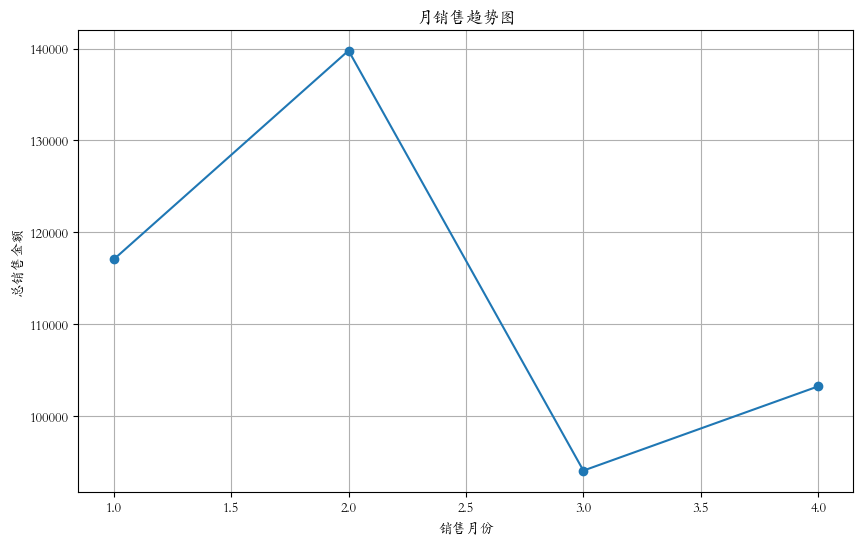

In [43]:
monthly_sales = df.groupby('销售月份')['销售金额'].sum().reset_index()

plt.figure(figsize=(10,6))
plt.plot(monthly_sales['销售月份'], monthly_sales['销售金额'], marker='o')
plt.title('月销售趋势图')
plt.xlabel('销售月份')
plt.ylabel('总销售金额')
plt.grid(True)
plt.show()

#### 3.类别销售对比

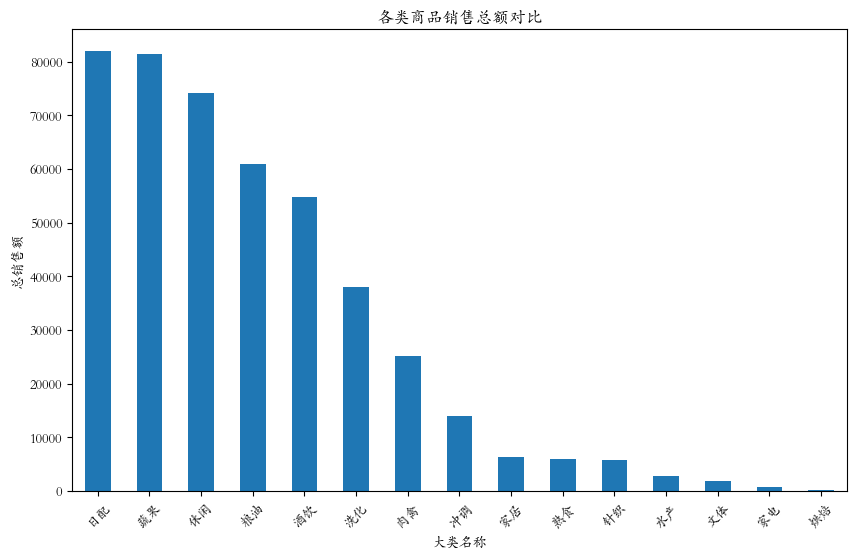

In [44]:
category_sales = df.groupby('大类名称')['销售金额'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
category_sales.plot(kind='bar')
plt.title('各类商品销售总额对比')
plt.ylabel('总销售额')
plt.xticks(rotation=45)
plt.show()

#### 4.商品销售分布

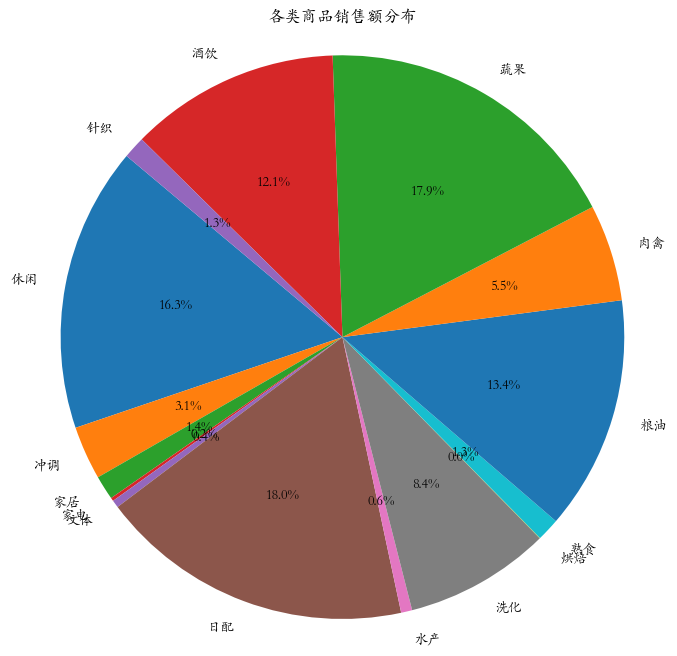

In [45]:
category_distribution = df.groupby('大类名称')['销售金额'].sum()

plt.figure(figsize=(8,8))
plt.pie(category_distribution, labels=category_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('各类商品销售额分布')
plt.axis('equal')  # 确保饼图为圆形
plt.show()

#### 5.促销效果分析

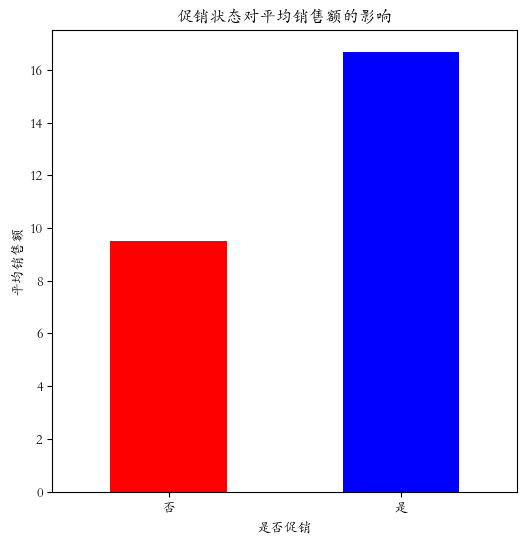

In [46]:
promotion_effect = df.groupby('是否促销')['销售金额'].mean()

plt.figure(figsize=(6,6))
promotion_effect.plot(kind='bar', color=['red', 'blue'])
plt.title('促销状态对平均销售额的影响')
plt.ylabel('平均销售额')
plt.xticks(rotation=0)
plt.show()

#### 6.单个商品销售情况

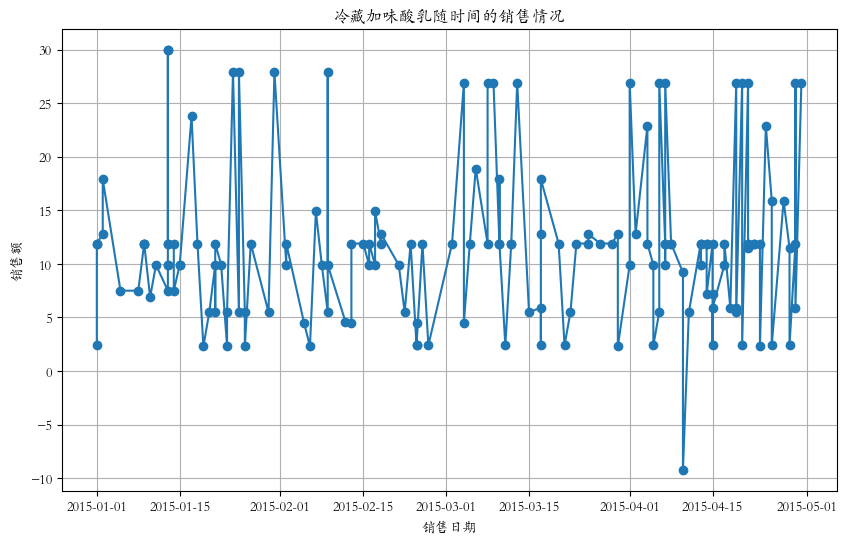

In [47]:
product_sales = df[df['小类名称'] == '冷藏加味酸乳']

plt.figure(figsize=(10,6))
plt.plot(product_sales['销售日期'], product_sales['销售金额'], marker='o')
plt.title('冷藏加味酸乳随时间的销售情况')
plt.xlabel('销售日期')
plt.ylabel('销售额')
plt.grid(True)
plt.show()

### 三、关联规则分析（商品之间的购买关系）

#### 1.导入所需库包

In [51]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

#### 2.将原始的交易数据转换成适合进行关联规则分析的格式

In [53]:
basket = (df.groupby(['顾客编号', '销售日期'])['商品编码']
          .apply(list)
          .reset_index(name='items'))

# 打印转换后的前几行数据，以检查分组是否正确
print("\n按顾客编号和销售日期分组后，展示前几条记录：")
display(basket)
# 将列表转换成适合TransactionEncoder的格式
transactions = basket['items'].tolist()

# 使用TransactionEncoder将数据转换为布尔矩阵
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_te = pd.DataFrame(te_ary, columns=te.columns_)

# 打印前几行的布尔矩阵，以确保转换正确
print("\n转换后的布尔矩阵，用于关联规则分析，展示前几条记录：")
display(df_te.head())


按顾客编号和销售日期分组后，展示前几条记录：


,顾客编号,销售日期,items
0,0,2015-01-01,"[DW-1201090311, DW-1201040026, DW-1308010192, ..."
1,0,2015-04-25,[DW-2006010001]
2,1,2015-01-01,"[DW-2014010019, DW-1201030002, DW-2007090052, ..."
3,1,2015-02-15,"[DW-3118010082, DW-2202050141, DW-2205020010]"
4,2,2015-01-01,"[DW-1505020011, DW-1201040010, DW-1201040036, ..."
...,...,...,...
8938,2607,2015-04-30,"[DW-1201090032, DW-2011070010, DW-1203130449]"
8939,2608,2015-04-30,"[DW-1001010194, DW-1001030041, DW-1521010085]"
8940,2609,2015-04-30,"[DW-2307040017, DW-2307010033, DW-2307050045, ..."
8941,2610,2015-04-30,"[DW-2317020081, DW-2317020131]"



转换后的布尔矩阵，用于关联规则分析，展示前几条记录：


,DW-1001010165,DW-1001010191,DW-1001010192,DW-1001010194,DW-1001010195,DW-1001010196,DW-1001010204,DW-1001010205,DW-1001020100,DW-1001020102,...,DW-3431050148,DW-3431050151,DW-3431060067,DW-3431070113,DW-3431070116,DW-3431070120,DW-3432010109,DW-3432010110,DW-3432010123,DW-3436990004
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [54]:
true_count = df_te.sum().sum()  # 计算所有列中True的总和
print(f"布尔矩阵中True的总数: {true_count}")

布尔矩阵中True的总数: 42409


#### 3.找出频繁项集

In [55]:
# 使用Apriori算法找出频繁项集
frequent_itemsets = apriori(df_te, min_support=0.01, use_colnames=True)

# 打印频繁项集的信息
print("\n找到的频繁项集：")
print(frequent_itemsets)



找到的频繁项集：
     support                        itemsets
0   0.022699                 (DW-1001010194)
1   0.011070                 (DW-1001010196)
2   0.014648                 (DW-1001010205)
3   0.012971                 (DW-1001040125)
4   0.017332                 (DW-1201010001)
..       ...                             ...
69  0.013083                 (DW-2009020015)
70  0.011853                 (DW-2202020177)
71  0.010623                 (DW-2202050126)
72  0.010064  (DW-1201040010, DW-1201040026)
73  0.012747  (DW-1201040035, DW-1201040010)

[74 rows x 2 columns]


#### 4.生成关联规则

In [58]:
# 生成关联规则
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1,num_itemsets=10000)

# 打印关联规则的前5条，以查看规则内容
print("\n生成的关联规则前五条：")
print(rules.head())

# 输出关联规则的总数
print(f"\n总共生成了 {len(rules)} 条关联规则。")


生成的关联规则前五条：
       antecedents      consequents  antecedent support  consequent support  \
0  (DW-1201040010)  (DW-1201040026)            0.061501            0.057028   
1  (DW-1201040026)  (DW-1201040010)            0.057028            0.061501   
2  (DW-1201040035)  (DW-1201040010)            0.054344            0.061501   
3  (DW-1201040010)  (DW-1201040035)            0.061501            0.054344   

    support  confidence      lift  representativity  leverage  conviction  \
0  0.010064    0.163636  2.869412               1.0  0.006556    1.127467   
1  0.010064    0.176471  2.869412               1.0  0.006556    1.139606   
2  0.012747    0.234568  3.814074               1.0  0.009405    1.226104   
3  0.012747    0.207273  3.814074               1.0  0.009405    1.192914   

   zhangs_metric   jaccard  certainty  kulczynski  
0       0.694190  0.092784   0.113056    0.170053  
1       0.690897  0.092784   0.122504    0.170053  
2       0.780213  0.123644   0.184409    0.220920

#### 5.输出相关信息

In [59]:
output_file_path = 'association_rules_results.csv'
rules.to_csv(output_file_path, index=False)
print(f"\n关联规则已保存至文件：{output_file_path}")

# 输出一些关于规则的统计信息
print("\n关联规则的一些统计数据：")
print("提升度（Lift）最高的规则：")
print(rules.nlargest(1, 'lift'))
print("支持度（Support）最高的规则：")
print(rules.nlargest(1, 'support'))
print("置信度（Confidence）最高的规则：")
print(rules.nlargest(1, 'confidence'))


关联规则已保存至文件：association_rules_results.csv

关联规则的一些统计数据：
提升度（Lift）最高的规则：
       antecedents      consequents  antecedent support  consequent support  \
2  (DW-1201040035)  (DW-1201040010)            0.054344            0.061501   

    support  confidence      lift  representativity  leverage  conviction  \
2  0.012747    0.234568  3.814074               1.0  0.009405    1.226104   

   zhangs_metric   jaccard  certainty  kulczynski  
2       0.780213  0.123644   0.184409     0.22092  
支持度（Support）最高的规则：
       antecedents      consequents  antecedent support  consequent support  \
2  (DW-1201040035)  (DW-1201040010)            0.054344            0.061501   

    support  confidence      lift  representativity  leverage  conviction  \
2  0.012747    0.234568  3.814074               1.0  0.009405    1.226104   

   zhangs_metric   jaccard  certainty  kulczynski  
2       0.780213  0.123644   0.184409     0.22092  
置信度（Confidence）最高的规则：
       antecedents      consequents  antecedent sup

### 四、分类分析决策树、RF、SVM运用（预测哪些产品可能参与促销）

#### 1.导入所需库包

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

#### 2.检查缺失值

In [62]:
# 检查是否有缺失值
print("\n检查缺失值情况：")
print(df.isnull().sum())
display(df)


检查缺失值情况：
顾客编号    0
大类编码    0
大类名称    0
中类编码    0
中类名称    0
小类编码    0
小类名称    0
销售日期    0
销售月份    0
商品编码    0
规格型号    0
商品类型    0
单位      0
销售数量    0
销售金额    0
商品单价    0
是否促销    0
dtype: int64


,顾客编号,大类编码,大类名称,中类编码,中类名称,小类编码,小类名称,销售日期,销售月份,商品编码,规格型号,商品类型,单位,销售数量,销售金额,商品单价,是否促销
0,0,12,蔬果,1201,蔬菜,120109,其它蔬菜,2015-01-01,1,DW-1201090311,,生鲜,个,8.000,4.00,2.00,否
1,1,20,粮油,2014,酱菜类,201401,榨菜,2015-01-01,1,DW-2014010019,60g,一般商品,袋,6.000,3.00,0.50,否
2,2,15,日配,1505,冷藏乳品,150502,冷藏加味酸乳,2015-01-01,1,DW-1505020011,150g,一般商品,袋,1.000,2.40,2.40,否
3,3,15,日配,1503,冷藏料理,150305,冷藏面食类,2015-01-01,1,DW-1503050035,500g,一般商品,袋,1.000,6.50,8.30,否
4,4,15,日配,1505,冷藏乳品,150502,冷藏加味酸乳,2015-01-01,1,DW-1505020020,100g*8,一般商品,袋,1.000,11.90,11.90,否
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42809,1605,12,蔬果,1201,蔬菜,120106,菌菇类,2015-04-30,4,DW-1201060002,散称,生鲜,千克,0.217,3.91,18.00,否
42810,1572,12,蔬果,1201,蔬菜,120102,根茎,2015-04-30,4,DW-1201020040,散称,生鲜,千克,0.440,0.86,1.96,否
42811,1170,30,洗化,3016,纸制品,301603,无芯纸,2015-04-30,4,DW-3016030007,10卷,一般商品,提,1.000,12.90,14.50,是
42812,2605,12,蔬果,1201,蔬菜,120101,叶菜,2015-04-30,4,DW-1201010023,散称,生鲜,千克,0.718,1.84,2.56,否


#### 3.特征工程

In [82]:
df['销售日期'] = pd.to_datetime(df['销售日期'])
df['星期'] = df['销售日期'].dt.weekday  # 提取星期几
df['是否周末'] = df['星期'].apply(lambda x: 1 if x > 5 else 0)  # 判断是否为周末

# 显示新添加的特征
print("\n显示新添加的特征：")
display(df[['销售日期', '星期', '是否周末']].sample(5))

# 对类别型变量进行编码
categorical_features = ['大类编码', '中类编码', '小类编码', '商品类型', '单位']
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("\n类别型特征：", numerical_features)
target = '是否促销'


显示新添加的特征：


,销售日期,星期,是否周末
24569,2015-03-08,6.0,1
41982,2015-04-29,2.0,0
37080,2015-04-15,2.0,0
35679,2015-04-11,5.0,0
5476,2015-01-15,3.0,0



类别型特征： ['顾客编号', '大类编码', '中类编码', '小类编码', '销售月份', '销售数量', '销售金额', '商品单价', '星期', '是否周末']


In [76]:
# 使用Pipeline和ColumnTransformer来简化流程并避免数据泄漏
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),  # 数值特征直接通过
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # 类别特征使用OneHot编码
    ])

# 定义不同模型的字典，方便切换
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(random_state=42)
}

# 分离特征和标签
X = df.drop([target], axis=1)
y = df[target]

# 将目标变量也进行编码
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


#### 4.模型训练

In [77]:
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 创建并评估每个模型
for model_name, model in models.items():
    print(f"\n正在训练 {model_name} 模型...")
    
    # 创建模型管道
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])
    
    # 训练模型
    pipeline.fit(X_train, y_train)
    
    # 预测并评估模型
    predictions = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"{model_name} 模型准确率: {accuracy:.2f}")
    
    # 输出分类报告
    print(f"\n{model_name} 分类报告:")
    print(classification_report(y_test, predictions))
    
    # 反编码预测结果，以便查看实际标签
    predicted_labels = label_encoder.inverse_transform(predictions)
    print(f"\n{model_name} 前五个预测的实际标签:")
    print(predicted_labels[:5])


正在训练 Decision Tree 模型...
Decision Tree 模型准确率: 0.98

Decision Tree 分类报告:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7233
           1       0.93      0.94      0.93      1330

    accuracy                           0.98      8563
   macro avg       0.96      0.96      0.96      8563
weighted avg       0.98      0.98      0.98      8563


Decision Tree 前五个预测的实际标签:
['是' '否' '否' '否' '否']

正在训练 Random Forest 模型...
Random Forest 模型准确率: 0.96

Random Forest 分类报告:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      7233
           1       0.90      0.86      0.88      1330

    accuracy                           0.96      8563
   macro avg       0.94      0.92      0.93      8563
weighted avg       0.96      0.96      0.96      8563


Random Forest 前五个预测的实际标签:
['否' '否' '否' '否' '否']

正在训练 SVM 模型...
SVM 模型准确率: 0.84

SVM 分类报告:
              precision    recall  f1-score   support

    

/opt/conda/envs/python35-paddle120-env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/envs/python35-paddle120-env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/envs/python35-paddle120-env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

### 五、聚类算法

#### 1.导入所需的库包

In [4]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from math import pi
import numpy as np

#### 2.数据预处理

In [84]:
# 选择用于聚类的特征
features_for_clustering = ['大类编码', '中类编码', '小类编码', '销售数量', '销售金额', '商品单价', '星期', '是否周末']

# 对类别型变量进行编码
for feature in ['大类编码', '中类编码', '小类编码']:
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature].astype(str))

# 标准化数值特征
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features_for_clustering])

# 将标准化后的特征转换回DataFrame
df_scaled = pd.DataFrame(scaled_features, columns=features_for_clustering)

# 显示标准化后的数据前几行
print("标准化后的数据前几行：")
display(df_scaled.head())

标准化后的数据前几行：


,大类编码,中类编码,小类编码,销售数量,销售金额,商品单价,星期,是否周末
0,-0.974539,0.369727,-0.516338,2.699733,-0.158006,-0.632794,0.075129,-0.396994
1,0.288846,0.277350,1.732229,1.905787,-0.181914,-0.722838,0.075129,-0.396994
2,-0.027000,-0.161440,2.073900,-0.079078,-0.196259,-0.608783,0.075129,-0.396994
3,-0.027000,-0.207629,1.889213,-0.079078,-0.098237,-0.254610,0.075129,-0.396994
4,-0.027000,-0.161440,2.073900,-0.079078,0.030866,-0.038505,0.075129,-0.396994


#### 3.确定最佳聚类数

In [89]:
df_scaled=df_scaled.dropna(subset='星期')

根据轮廓系数，最佳簇数是: 9


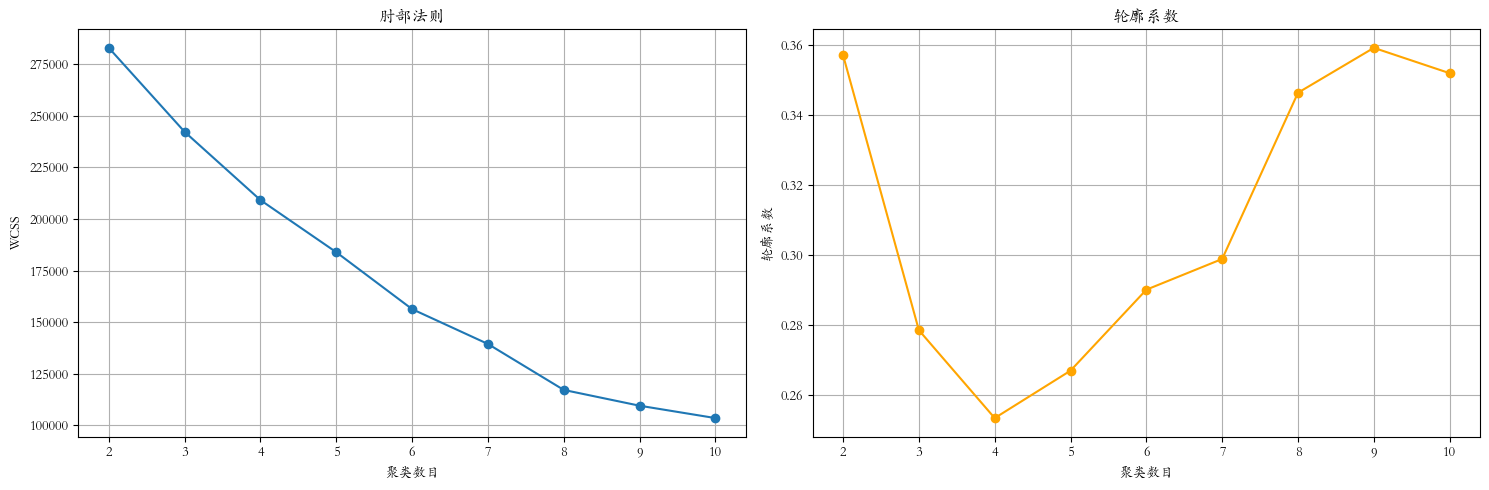

K=2: WCSS=282838.63, 轮廓系数=0.36
K=3: WCSS=242173.23, 轮廓系数=0.28
K=4: WCSS=209123.34, 轮廓系数=0.25
K=5: WCSS=183883.97, 轮廓系数=0.27
K=6: WCSS=156326.51, 轮廓系数=0.29
K=7: WCSS=139455.97, 轮廓系数=0.30
K=8: WCSS=117204.21, 轮廓系数=0.35
K=9: WCSS=109559.10, 轮廓系数=0.36
K=10: WCSS=103569.86, 轮廓系数=0.35


In [93]:

# 使用肘部法和轮廓系数确定最佳K值


wcss = []
sil_scores = []

# 从2开始聚类，因为1个簇没有意义且会导致轮廓系数计算错误
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
    
    # 计算轮廓系数
    if len(set(kmeans.labels_)) > 1:  # 确保至少有两个簇以计算轮廓系数
        sil_scores.append(silhouette_score(df_scaled, kmeans.labels_))
    else:
        sil_scores.append(-1)  # 如果只有1个簇，则设置为-1，表示无效

# 找到轮廓系数最大的K值
best_k = sil_scores.index(max(sil_scores)) + 2  # 因为我们是从2开始聚类的

print(f"根据轮廓系数，最佳簇数是: {best_k}")

# 绘制肘部图
plt.figure(figsize=(15, 5))

# 第一个子图：肘部法则
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), wcss, marker='o')
plt.title('肘部法则')
plt.xlabel('聚类数目')
plt.ylabel('WCSS')
plt.grid(True)

# 第二个子图：轮廓系数
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), sil_scores, marker='o', color='orange')
plt.title('轮廓系数')
plt.xlabel('聚类数目')
plt.ylabel('轮廓系数')
plt.grid(True)

plt.tight_layout()
plt.show()

# 输出每个K值对应的WCSS和轮廓系数
for i, (w, s) in enumerate(zip(wcss, sil_scores), start=2):
    print(f"K={i}: WCSS={w:.2f}, 轮廓系数={s:.2f}")

In [95]:
kmeans_final = KMeans(n_clusters=best_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
df=df.dropna(subset="星期")
df['Cluster'] = kmeans_final.fit_predict(df_scaled)

# 显示每个簇的数量
print("每个簇的大小:")
print(df['Cluster'].value_counts())

每个簇的大小:
Cluster
5    10629
1     9406
0     6653
7     5901
2     5586
4     2308
8     1587
6      739
3        3
Name: count, dtype: int64


/tmp/ipykernel_635/620609838.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = kmeans_final.fit_predict(df_scaled)



每个簇的各项特征平均值:
             大类编码      中类编码      小类编码      销售数量        销售金额       商品单价  \
Cluster                                                                  
0        0.005140 -0.020278  1.730474 -0.016153   -0.039382  -0.155572   
1       -0.991597  0.505968 -0.778362 -0.234124   -0.175426  -0.362918   
2        0.008056  0.048161 -0.020947 -0.098027   -0.053559  -0.099847   
3        1.236384  1.308893  0.039262  9.051302  103.984660  32.263197   
4        1.545388 -0.994063  0.630681 -0.055342   -0.015361  -0.092880   
5        0.952423  0.769213 -0.459754 -0.073037   -0.054810  -0.103394   
6        0.170884 -1.116866 -0.100942  5.961467    1.140136  -0.486362   
7       -0.886706 -1.714065 -0.057100 -0.059968    0.048120   0.134554   
8        0.414826  0.102303 -0.147013 -0.199993    0.876499   3.647733   

               星期      是否周末  
Cluster                      
0       -0.265220 -0.396994  
1       -0.286131 -0.396994  
2        1.580007  2.518928  
3       -0.928123 -0.

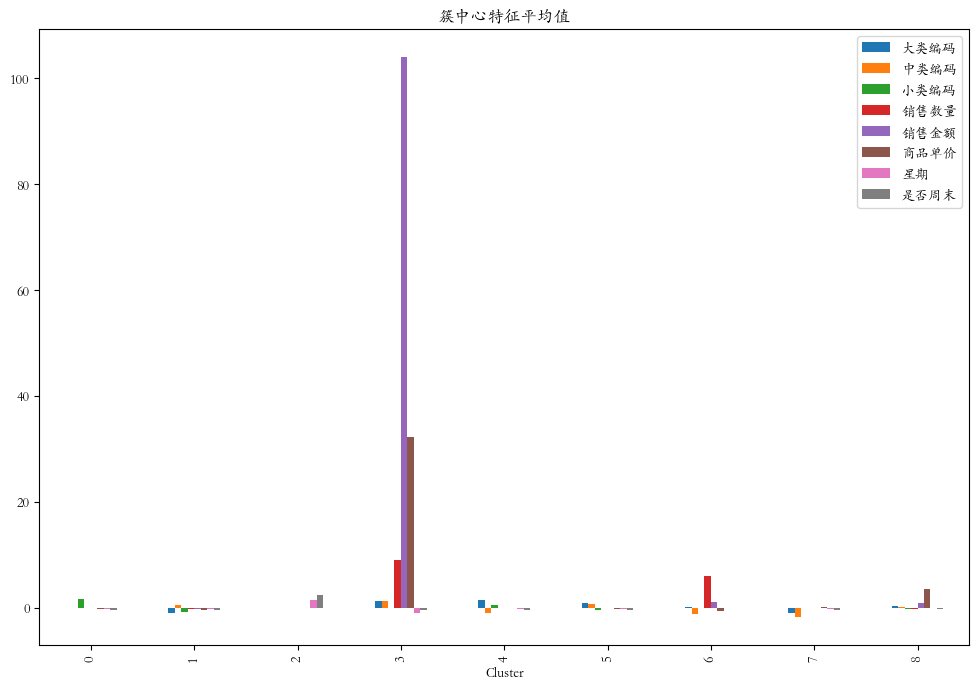

In [96]:
# 计算每个簇的各项特征平均值
cluster_centers = pd.DataFrame(kmeans_final.cluster_centers_, columns=df_scaled.columns)
cluster_centers.index.name = 'Cluster'
print("\n每个簇的各项特征平均值:")
print(cluster_centers)

# 可视化簇中心
cluster_centers.plot(kind='bar', figsize=(12, 8), title='簇中心特征平均值')
plt.show()

#### 4.可视化聚类结果（雷达图）

/tmp/ipykernel_635/165762166.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab10')  # 'tab10' colormap提供10种不同颜色


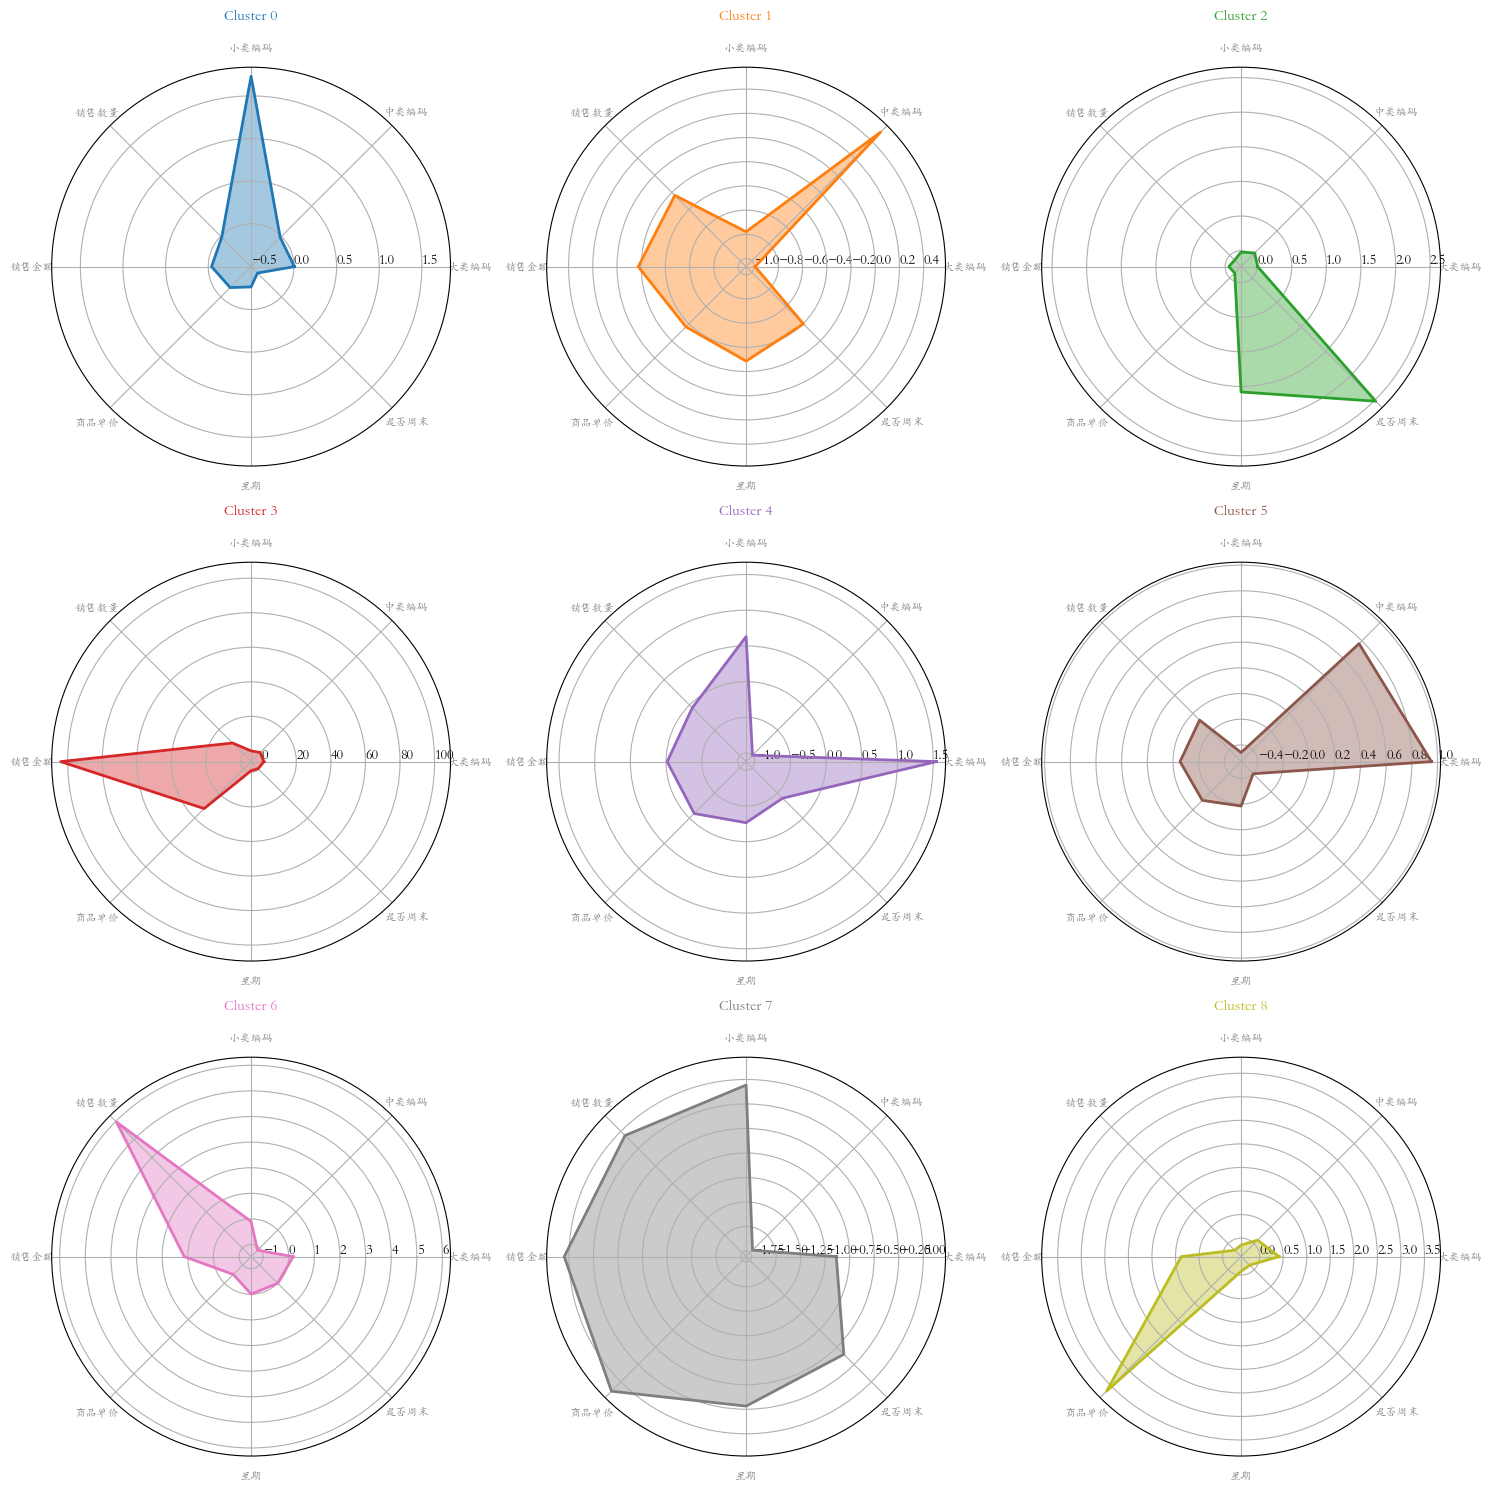

In [98]:
def make_spider_plot(df, cluster_name, title, color):
    categories = df.columns
    N = len(categories)

    values = df.loc[cluster_name].values.flatten().tolist()
    values += values[:1]
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    ax = plt.subplot(3, 3, cluster_name + 1, polar=True)  # 修改为3x3网格布局以适应9个簇
    plt.xticks(angles[:-1], categories, color='grey', size=8)
    ax.set_rlabel_position(0)
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    plt.title(title, size=11, color=color, y=1.1)

# 使用matplotlib colormap生成颜色列表
cmap = plt.cm.get_cmap('tab10')  # 'tab10' colormap提供10种不同颜色
colors = [cmap(i) for i in range(best_k)]

# 绘制雷达图
plt.figure(figsize=(15, 15))
for i in range(best_k):
    make_spider_plot(cluster_centers, i, f'Cluster {i}', colors[i])
plt.tight_layout()
plt.show()